In [2]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fileptr_2016preVFP_ee  = uproot.open("/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016preVFP_old_minitrees/Nominal/ee/histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP.root")
fileptr_2016postVFP_ee = uproot.open("/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016postVFP_old_minitrees/Nominal/ee/histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016ULpostVFP.root")

In [6]:
fileptr_2016preVFP_ee['hNrOfEvts'].to_numpy()

(array([2.70452754e+09]), array([0.5, 1.5]))

In [7]:
fileptr_2016postVFP_ee['hNrOfEvts'].to_numpy()

(array([3.14517156e+09]), array([0.5, 1.5]))

In [8]:
b1k_array_2016preVFP  = fileptr_2016preVFP_ee["hreco_b1k"].to_numpy()[0]
b1k_array_2016postVFP = fileptr_2016postVFP_ee["hreco_b1k"].to_numpy()[0]

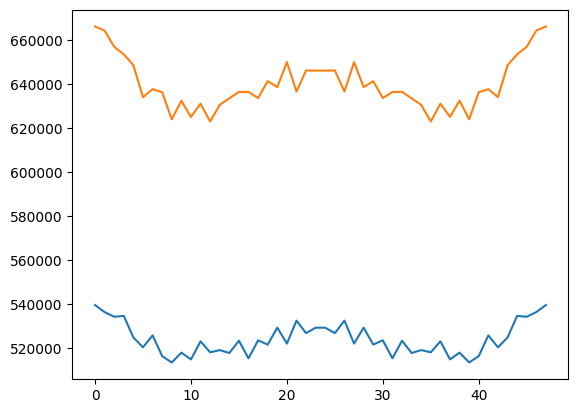

In [9]:
plt.plot(b1k_array_2016preVFP)
plt.plot(b1k_array_2016postVFP)

In [10]:
fileptr_2016preVFP_ee["hreco_b1k"].to_hist()

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=2.51549e+07, variance=8.63758e+08)

In [11]:
fileptr_2016postVFP_ee["hreco_b1k"].to_hist()

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=3.07175e+07, variance=1.04819e+09)

## Trying adding histograms yourself

In [79]:
root_fileptr_2016preVFP  = ROOT.TFile("/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016preVFP_old_minitrees/Nominal/ee/histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP.root", "READ")
root_fileptr_2016postVFP = ROOT.TFile("/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016postVFP_old_minitrees/Nominal/ee/histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016ULpostVFP.root", "READ")

In [80]:
sc_2016preVFP  = root_fileptr_2016preVFP.Get("hreco_b1k") 
sc_2016postVFP = root_fileptr_2016postVFP.Get("hreco_b1k") 

In [81]:
sc_2016 = sc_2016preVFP.Clone()
sc_2016.Reset()

In [82]:
# sc_2016preVFP.Scale(0.0006238)
# sc_2016postVFP.Scale(0.0005364)

In [83]:
sc_2016.Add(sc_2016preVFP)
sc_2016.Add(sc_2016postVFP)

True

In [84]:
%jsroot
c = ROOT.TCanvas("c", "c", 800, 600)
sc_2016.Draw()
c.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


## Lumi scaled

In [73]:
sc_2016 = sc_2016preVFP.Clone()
sc_2016.Reset()

sc_2016preVFP.Scale(0.0006238)
sc_2016postVFP.Scale(0.0005364)

sc_2016.Add(sc_2016preVFP)
sc_2016.Add(sc_2016postVFP)

c = ROOT.TCanvas("c", "c", 800, 600)
sc_2016.Draw()
c.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


In [85]:
added_histogram = []
for i in range(1,49) :
    added_histogram.append(sc_2016.GetBinContent(i))

In [86]:
added_histogram = np.array(added_histogram)

## hadded file

In [87]:
hadded_file = uproot.open("/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016/Nominal/ee/histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016UL.root")

In [88]:
hadded_file["hreco_b1k"].to_hist()

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=5.58723e+07, variance=1.91195e+09)

In [89]:
hadded_file["hreco_b1k"].to_numpy()[0]

array([1205476.08529353, 1200392.30328215, 1190911.8219099 ,
       1187875.90705872, 1173093.94960308, 1154136.51724373,
       1163175.72884083, 1152428.32273647, 1137184.01473045,
       1150092.43701363, 1139691.29923162, 1153902.25326206,
       1140781.83310318, 1149380.2793293 , 1151024.40202615,
       1159528.60212803, 1151477.79925871, 1156922.2595892 ,
       1162645.78002167, 1167632.04390907, 1171776.73794079,
       1168814.99456439, 1172695.18914986, 1175128.80218887,
       1175128.80218887, 1172695.18914986, 1168814.99456439,
       1171776.73794079, 1167632.04390907, 1162645.78002167,
       1156922.2595892 , 1151477.79925871, 1159528.60212803,
       1151024.40202615, 1149380.2793293 , 1140781.83310318,
       1153902.25326206, 1139691.29923162, 1150092.43701363,
       1137184.01473045, 1152428.32273647, 1163175.72884083,
       1154136.51724373, 1173093.94960308, 1187875.90705872,
       1190911.8219099 , 1200392.30328215, 1205476.08529353])

In [90]:
b1k_array_hadded = hadded_file["hreco_b1k"].to_numpy()[0]

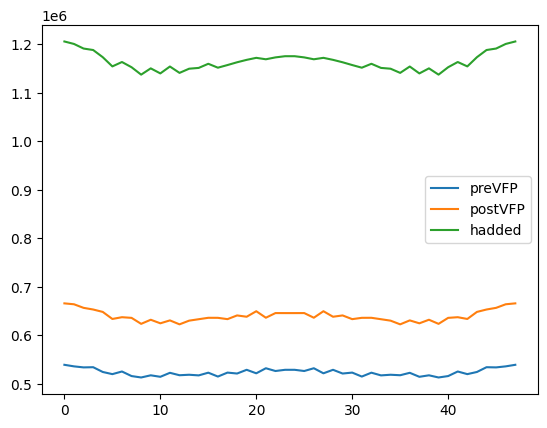

In [91]:
plt.plot(b1k_array_2016preVFP , label="preVFP")
plt.plot(b1k_array_2016postVFP, label="postVFP")
plt.plot(b1k_array_hadded, label="hadded")
plt.legend()

In [92]:
hadded_histogram = hadded_file["hreco_b1k"].to_numpy()[0]

In [93]:
bin_centers = hadded_file["hreco_b1k"].to_numpy()[1]

In [94]:
hadded_histogram == added_histogram

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [95]:
hadded_histogram

array([1205476.08529353, 1200392.30328215, 1190911.8219099 ,
       1187875.90705872, 1173093.94960308, 1154136.51724373,
       1163175.72884083, 1152428.32273647, 1137184.01473045,
       1150092.43701363, 1139691.29923162, 1153902.25326206,
       1140781.83310318, 1149380.2793293 , 1151024.40202615,
       1159528.60212803, 1151477.79925871, 1156922.2595892 ,
       1162645.78002167, 1167632.04390907, 1171776.73794079,
       1168814.99456439, 1172695.18914986, 1175128.80218887,
       1175128.80218887, 1172695.18914986, 1168814.99456439,
       1171776.73794079, 1167632.04390907, 1162645.78002167,
       1156922.2595892 , 1151477.79925871, 1159528.60212803,
       1151024.40202615, 1149380.2793293 , 1140781.83310318,
       1153902.25326206, 1139691.29923162, 1150092.43701363,
       1137184.01473045, 1152428.32273647, 1163175.72884083,
       1154136.51724373, 1173093.94960308, 1187875.90705872,
       1190911.8219099 , 1200392.30328215, 1205476.08529353])

In [96]:
added_histogram

array([1205476.08529353, 1200392.30328215, 1190911.8219099 ,
       1187875.90705872, 1173093.94960308, 1154136.51724373,
       1163175.72884083, 1152428.32273647, 1137184.01473045,
       1150092.43701363, 1139691.29923162, 1153902.25326206,
       1140781.83310318, 1149380.2793293 , 1151024.40202615,
       1159528.60212803, 1151477.79925871, 1156922.2595892 ,
       1162645.78002167, 1167632.04390907, 1171776.73794079,
       1168814.99456439, 1172695.18914986, 1175128.80218887,
       1175128.80218887, 1172695.18914986, 1168814.99456439,
       1171776.73794079, 1167632.04390907, 1162645.78002167,
       1156922.2595892 , 1151477.79925871, 1159528.60212803,
       1151024.40202615, 1149380.2793293 , 1140781.83310318,
       1153902.25326206, 1139691.29923162, 1150092.43701363,
       1137184.01473045, 1152428.32273647, 1163175.72884083,
       1154136.51724373, 1173093.94960308, 1187875.90705872,
       1190911.8219099 , 1200392.30328215, 1205476.08529353])

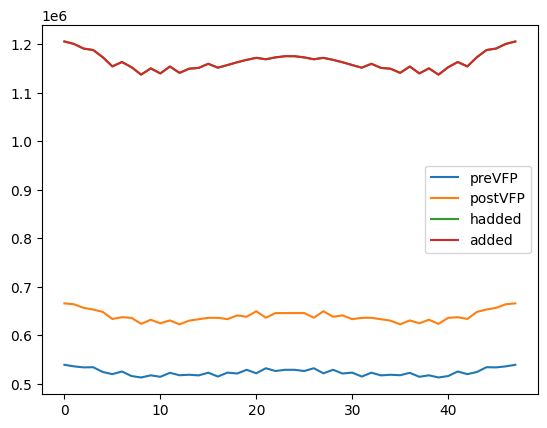

In [97]:
plt.plot(b1k_array_2016preVFP , label="preVFP")
plt.plot(b1k_array_2016postVFP, label="postVFP")
plt.plot(hadded_histogram, label='hadded')
plt.plot(added_histogram, label='added')
plt.legend()

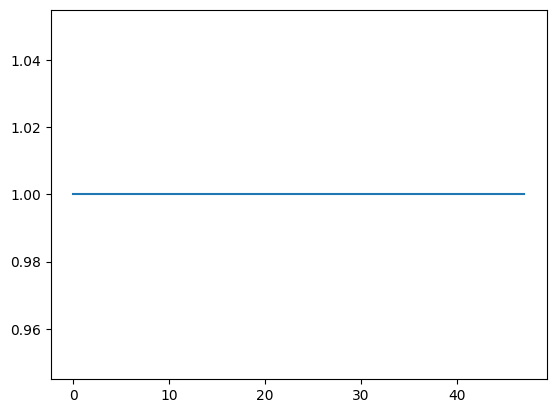

In [71]:
plt.plot(np.divide(added_histogram, hadded_histogram))